# PREDIKSI HUJAN MENGGUNAKAN LOGISTIC REGRESSION

---

### Dosen Pengampu:
* Prof. Dr. Ermatita, M.Kom.
* Dian Palupi R., S.Si., M.Kom., Ph.D.

### Disusun Oleh: Kelompok 1
1. Andini Marsha Daniswara (09021282328033)
2. Farrel Athaillah Wijaya (09021382328135)
3. Nabilah Shamid (09021382328147)
4. Afny Chiara Wildani. Nst (09021382328167)

#### PROGRAM STUDI TEKNIK INFORMATIKA | FAKULTAS ILMU KOMPUTER | UNIVERSITAS SRIWIJAYA

# Project Overview
---
## Data Source
Data yang digunakan dalam proyek ini diunduh dari Kaggle dataset berjudul [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style untuk visualisasi
sns.set(style="whitegrid")

# Load Dataset

In [ ]:
df = pd.read_csv('weatherAUS.csv')

### Definisi Kolom
Menurut penulis dataset Kaggle dan ["Notes to accompany Daily Weather Observations"] (http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml) yang diterbitkan oleh Australian Bureau of Meteorology, arti dan satuan untuk setiap kolom dalam dataset adalah sebagai berikut:

| **Column Name** | **Definition** | **Units** |
| --------------- | -------------- | --------- |
| `Date` | Date of the observation | N/A |
| `Location` | Location of the weather station | N/A |
| `MinTemp` | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `MaxTemp` | Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `Rainfall` | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimeter | Millimeters |
| `Evaporation` | "Class A" pan evaporation in the 24 hours to 9am | Millimeters |
| `Sunshine` | Bright sunshine in the 24 hours to midnight | Hours |
| `WindGustDir` | Direction of the strongest wind gust in the 24 hours to midnight | 16 compass points |
| `WindGustSpeed` | Speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour |
| `WindDir9am` | Direction of the wind at 9am | 16 compass points |
| `WindDir3pm` | Direction of the wind at 3pm | 16 compass points |
| `WindSpeed9am` | Speed of the wind at 9am | Kilometers per hour |
| `WindSpeed3pm` | Speed of the wind at 3pm | Kilometers per hour |
| `Humidity9am` | Relative humidity at 9am | Percent |
| `Humidity3pm` | Relative humidity at 3pm | Percent |
| `Pressure9am` | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals |
| `Pressure3pm` | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals |
| `Cloud9am` | Fraction of sky obscured by cloud at 9am | Eighths |
| `Cloud3pm` | Fraction of sky obscured by cloud at 3pm | Eighths |
| `Temp9am` | Temparature at 9am | Degrees Celsius |
| `Temp3pm` | Temparature at 3am | Degrees Celsius |
| `RainToday` | Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |
| `RainTomorrow` | Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |

## Exploratory Data Analysis (EDA)
---

In [ ]:
# Tampilkan 5 baris pertama
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Statistik deskriptif
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Cek missing values
print("\nJumlah Missing Values per Kolom:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))


Jumlah Missing Values per Kolom:
               Missing Values  Percentage
Sunshine                69835   48.009762
Evaporation             62790   43.166506
Cloud3pm                59358   40.807095
Cloud9am                55888   38.421559
Pressure9am             15065   10.356799
Pressure3pm             15028   10.331363
WindDir9am              10566    7.263853
WindGustDir             10326    7.098859
WindGustSpeed           10263    7.055548
Humidity3pm              4507    3.098446
WindDir3pm               4228    2.906641
Temp3pm                  3609    2.481094
RainTomorrow             3267    2.245978
Rainfall                 3261    2.241853
RainToday                3261    2.241853
WindSpeed3pm             3062    2.105046
Humidity9am              2654    1.824557
WindSpeed9am             1767    1.214767
Temp9am                  1767    1.214767
MinTemp                  1485    1.020899
MaxTemp                  1261    0.866905


In [ ]:
# Menyesuaikan Kolom RainTomorrow
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
# Distribusi target variable (RainTomorrow)
print("\nDistribusi Target Variable (RainTomorrow):")
target_distribution = df['RainTomorrow'].value_counts()
print(target_distribution)
print(f"Persentase 'No': {target_distribution[0] / len(df) * 100:.2f}%")
print(f"Persentase 'Yes': {target_distribution[1] / len(df) * 100:.2f}%")


Distribusi Target Variable (RainTomorrow):
RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64
Persentase 'No': 75.84%
Persentase 'Yes': 21.91%


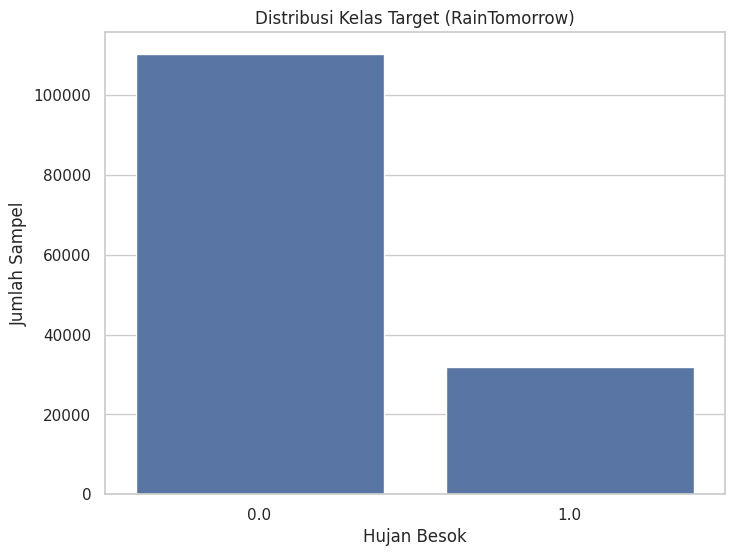

In [ ]:
# Visualisasi distribusi target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribusi Kelas Target (RainTomorrow)')
plt.xlabel('Hujan Besok')
plt.ylabel('Jumlah Sampel')
plt.savefig('target_distribution.png')
plt.show()

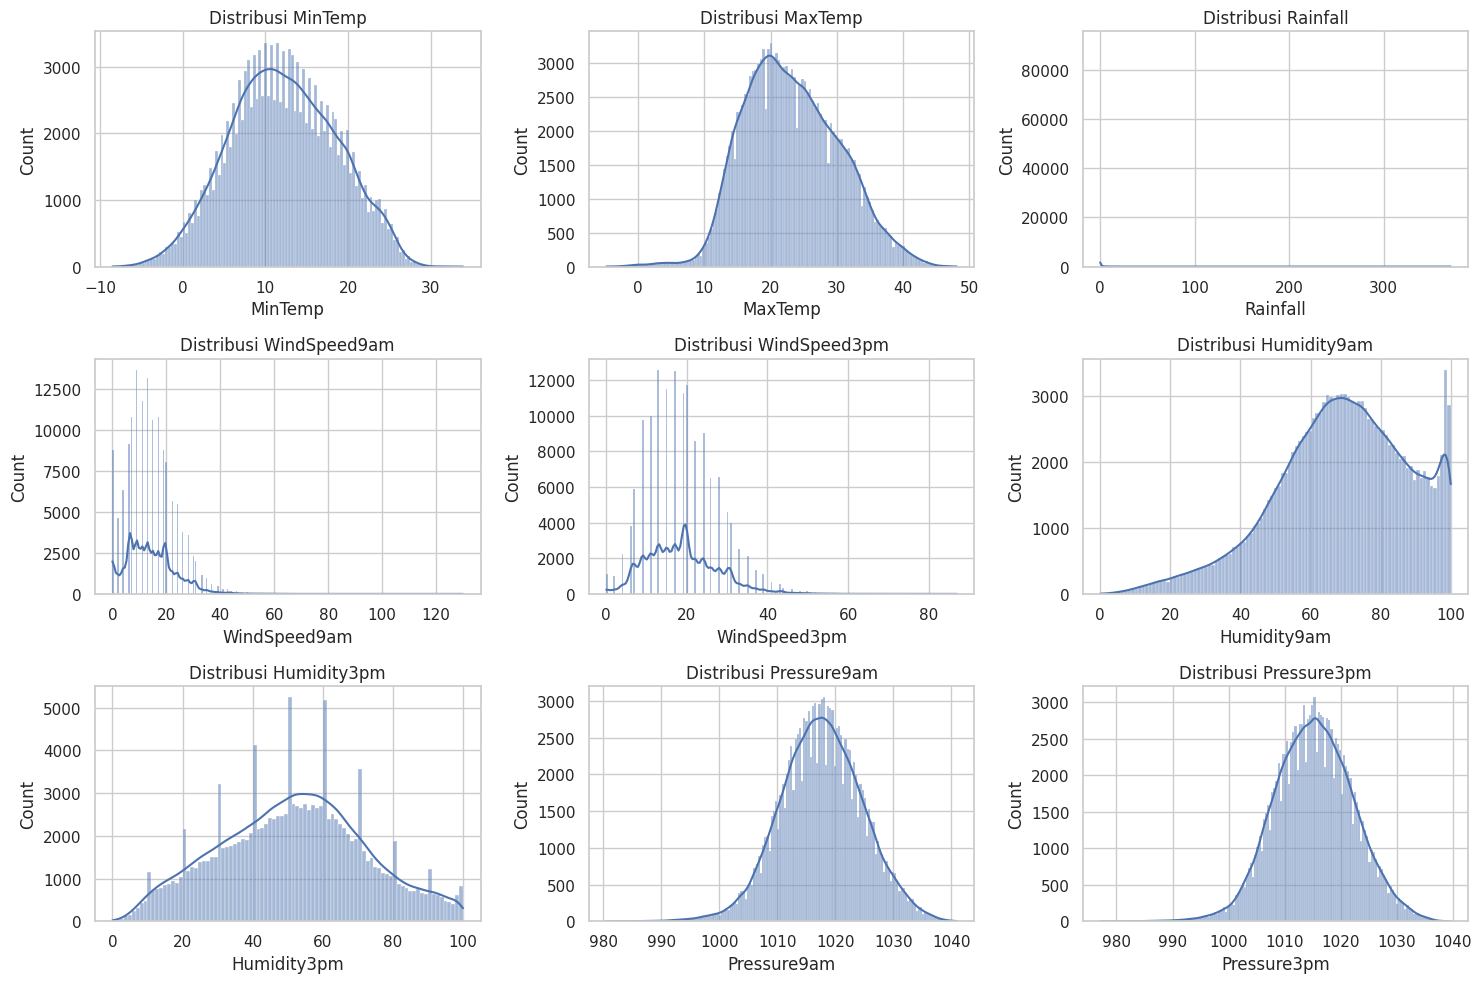

In [ ]:
# Visualisasi beberapa fitur numerik
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:9]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.savefig('Histogram.png')
plt.show()

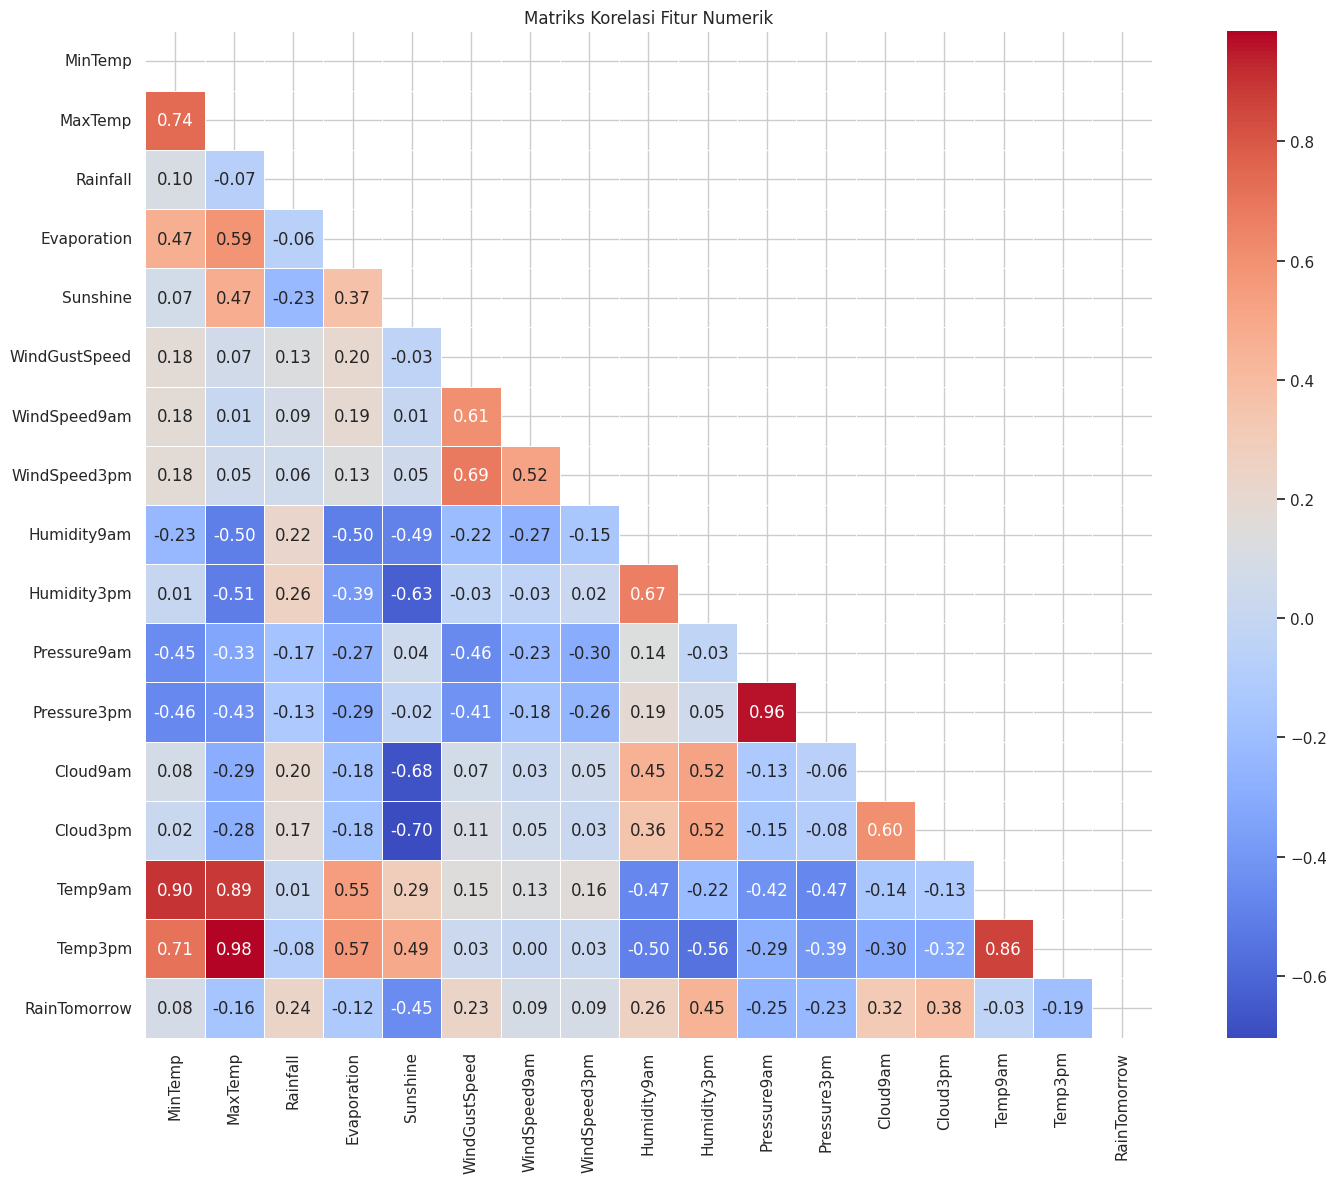

In [ ]:
# Korelasi antar fitur numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

## PREPOCESSING DATA
---

## Feature Engineering

In [ ]:
# Konversi kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Ekstraksi fitur dari tanggal
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [ ]:
# Hapus kolom Date yang sudah tidak diperlukan
df = df.drop('Date', axis=1)

## Encoding Variabel Kategorikal

In [ ]:
# Label encoding untuk target variable dan fitur biner
label_encoder = LabelEncoder()
df['RainToday'] = label_encoder.fit_transform(df['RainToday'].astype(str))
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'].astype(str))
print("RainToday & RainTomorrow: 'No' -> 0, 'Yes' -> 1")

RainToday & RainTomorrow: 'No' -> 0, 'Yes' -> 1


## Persiapan Data untuk Model

In [ ]:
# Pisahkan fitur dan target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
# Identifikasi tipe kolom
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Jumlah fitur numerik: {len(numerical_cols)}")
print(f"Jumlah fitur kategorikal: {len(categorical_cols)}")

Jumlah fitur numerik: 17
Jumlah fitur kategorikal: 4


In [ ]:
# Pembagian data menjadi training dan testing dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Ukuran data training: {X_train.shape}, {y_train.shape}")
print(f"Ukuran data testing: {X_test.shape}, {y_test.shape}")

Ukuran data training: (116368, 25), (116368,)
Ukuran data testing: (29092, 25), (29092,)


In [ ]:
# Cek distribusi target pada data training dan testing
print("\nDistribusi Target pada Data Training:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)
print("\nDistribusi Target pada Data Testing:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)


Distribusi Target pada Data Training:
RainTomorrow
0    75.839578
1    21.914100
2     2.246322
Name: proportion, dtype: float64

Distribusi Target pada Data Testing:
RainTomorrow
0    75.838719
1    21.916678
2     2.244603
Name: proportion, dtype: float64


## Prepocessing Pipeline

In [ ]:
# Pipeline untuk preprocessing fitur numerik
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# Pipeline untuk preprocessing fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Gabungkan preprocessing untuk fitur numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Preprocessing pada data training
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"Ukuran data training setelah preprocessing: {X_train_processed.shape}")
print(f"Ukuran data testing setelah preprocessing: {X_test_processed.shape}")

Ukuran data training setelah preprocessing: (116368, 114)
Ukuran data testing setelah preprocessing: (29092, 114)


## Feature Selection

In [ ]:
# Pilih 15 fitur terbaik
feature_selector = SelectKBest(f_classif, k=15)
X_train_selected = feature_selector.fit_transform(X_train_processed, y_train)
X_test_selected = feature_selector.transform(X_test_processed)
print(f"Ukuran data training setelah feature selection: {X_train_selected.shape}")
print(f"Ukuran data testing setelah feature selection: {X_test_selected.shape}")

Ukuran data training setelah feature selection: (116368, 15)
Ukuran data testing setelah feature selection: (29092, 15)


##  Mengatasi Class Imbalance

In [ ]:
# Implementasi RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_selected, y_train)

In [ ]:
print(f"Ukuran data training setelah oversampling: {X_train_resampled.shape}")
print("Distribusi kelas setelah oversampling:")
print(pd.Series(y_train_resampled).value_counts())

Ukuran data training setelah oversampling: (264759, 15)
Distribusi kelas setelah oversampling:
RainTomorrow
1    88253
0    88253
2    88253
Name: count, dtype: int64


# MODEL IMPLEMENTATION
---

In [ ]:
# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(C=1.0,
                                    penalty='l2',
                                    solver='liblinear',
                                    max_iter=100,
                                    random_state=42)

In [ ]:
# Melatih model
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='liblinear')

# Model Evaluation
---

In [ ]:
# Prediksi pada data test
y_pred = logistic_model.predict(X_test_selected)
y_pred_proba = logistic_model.predict_proba(X_test_selected)[:, 1]

In [ ]:
# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16112  4005  1946]
 [ 1231  4478   667]
 [   91    69   493]]


Visualisasi confusion matrix disimpan sebagai 'confusion_matrix.png'


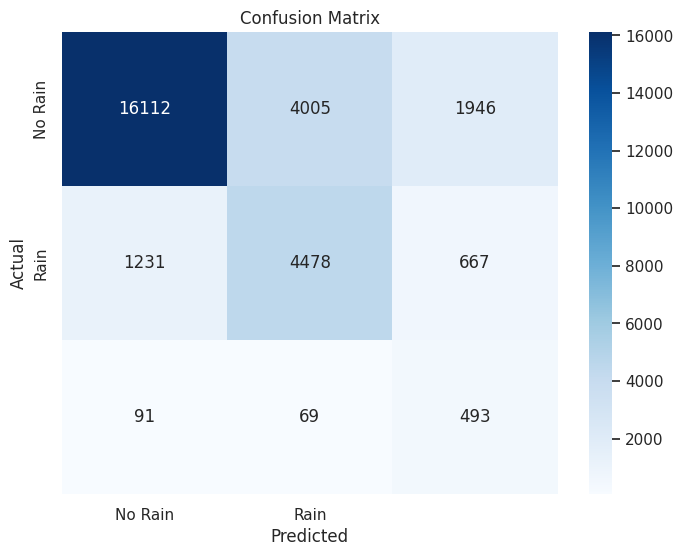

In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['No Rain', 'Rain']))

              precision    recall  f1-score   support

     No Rain       0.92      0.73      0.82     22063
        Rain       0.52      0.70      0.60      6376

   micro avg       0.79      0.72      0.76     28439
   macro avg       0.72      0.72      0.71     28439
weighted avg       0.83      0.72      0.77     28439



In [ ]:
# Buat mask untuk filter data yang hanya memiliki kelas 0 dan 1
mask = np.isin(y_test, [0, 1])
y_test_binary = y_test[mask]
y_pred_proba_binary = y_pred_proba[mask]

print(f"Jumlah sampel setelah filter: {len(y_test_binary)}")
print(f"Nilai unik dalam y_test setelah filter: {np.unique(y_test_binary)}")

Jumlah sampel setelah filter: 28439
Nilai unik dalam y_test setelah filter: [0 1]


In [ ]:
# Hitung ROC Curve dan AUC Score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_binary)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 0.8397


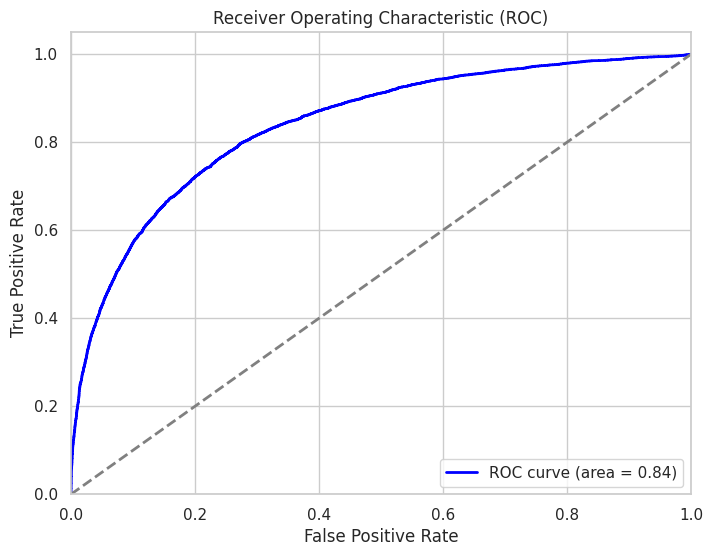

In [ ]:
# Visualisasi ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')

In [ ]:
# Threshold Analysis
precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_pred_proba_binary)

Visualisasi Precision-Recall curve disimpan sebagai 'precision_recall_curve.png'


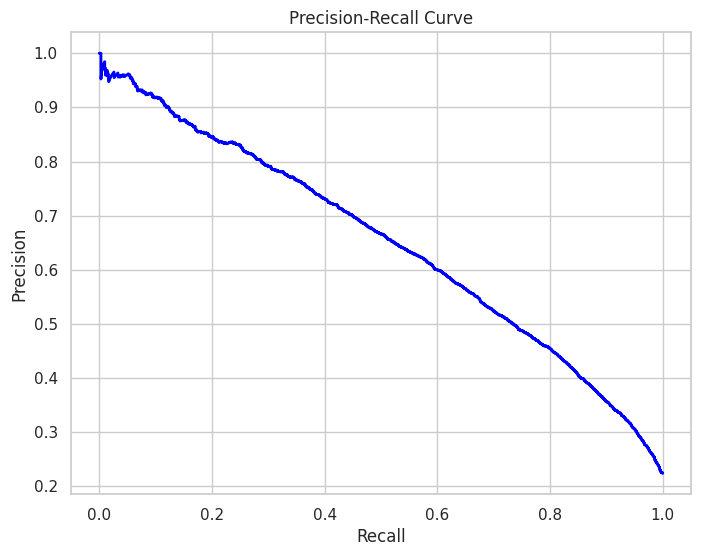

In [ ]:
# Visualisasi Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.savefig('precision_recall_curve.png')
print("Visualisasi Precision-Recall curve disimpan sebagai 'precision_recall_curve.png'")

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42),
    X_train_selected, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

In [ ]:
# Hitung rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

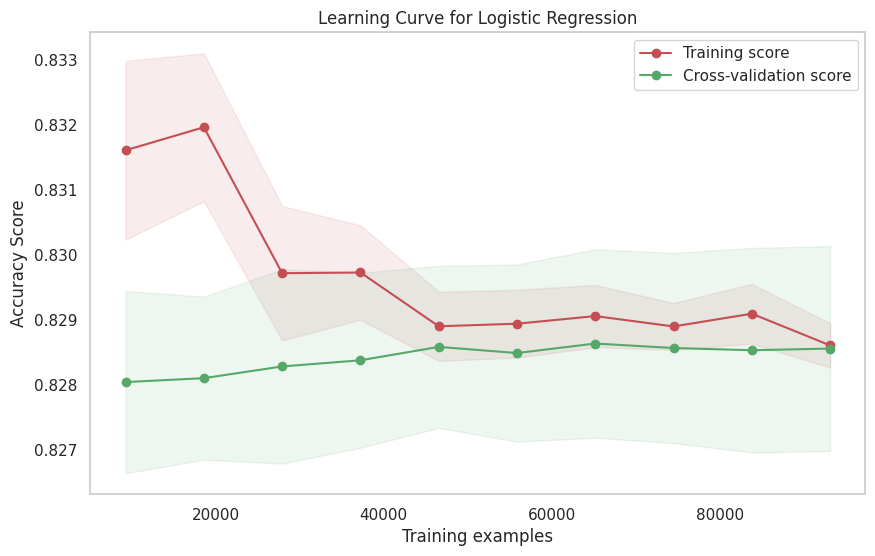

In [ ]:
# Visualisasi Learning Curve
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Logistic Regression")
plt.legend(loc="best")
plt.savefig('learning_curve.png')

# Analisis Fitur
---

In [ ]:
# Dapatkan nama fitur dari preprocessor
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(features))
    else:
        feature_names.extend(features)

In [ ]:
# Pilih hanya fitur yang digunakan setelah SelectKBest
selected_indices = feature_selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_indices]

In [ ]:
# Tampilkan koefisien dengan nama fitur
coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print("Fitur dengan koefisien terbesar (positif, meningkatkan peluang hujan):")
print(coef_df.head(5))
print("\nFitur dengan koefisien terkecil (negatif, menurunkan peluang hujan):")
print(coef_df.tail(5))

Fitur dengan koefisien terbesar (positif, meningkatkan peluang hujan):
       Feature  Coefficient
7  Pressure3pm     1.279856
2     Sunshine     0.235528
0      MaxTemp     0.190757
1     Rainfall     0.080001
4  Humidity9am     0.057554

Fitur dengan koefisien terkecil (negatif, menurunkan peluang hujan):
                 Feature  Coefficient
5            Humidity3pm    -0.801835
6            Pressure9am    -1.017809
14         WindGustDir_W    -1.070789
12    Location_Melbourne    -1.439121
13  Location_Williamtown    -1.731777
